# Collect and Process Data for Stock Trends

In [8]:
import yfinance as yf

In [9]:
yf.__version__


'0.2.61'

In [ ]:
['AAPL', 'TSM', 'NVDA', 'GOOGL', 'AMZN', 'MSFT', 'META', 'BRK-B', 'V', 'JNJ', 'PG', 'UNH', 'HD', 'MA', 'DIS', 'VZ', 'PYPL', 'NFLX', 'INTC', 'CMCSA']

In [11]:
df_ = yf.download(['AAPL','TSM'], start="2024-01-01")

[*********************100%***********************]  2 of 2 completed


In [12]:
df_

Price            Close                    High                     Low  \
Ticker            AAPL         TSM        AAPL         TSM        AAPL   
Date                                                                     
2024-01-02  184.290421   99.724220  187.070068  100.794838  182.553143   
2024-01-03  182.910522   98.388412  184.528677   99.449206  182.096477   
2024-01-04  180.587555   97.366905  181.758969   98.653611  179.565044   
2024-01-05  179.862839   97.838371  181.431354   98.850051  178.860187   
2024-01-08  184.210999  100.421593  184.250716  100.961814  180.180517   
...                ...         ...         ...         ...         ...   
2025-05-22  201.360001  196.190002  202.750000  196.830002  199.699997   
2025-05-23  195.270004  191.979996  197.699997  192.800003  193.460007   
2025-05-27  200.210007  197.679993  200.740005  198.309998  197.429993   
2025-05-28  200.419998  196.139999  202.729996  198.070007  199.899994   
2025-05-29  199.949997  197.149994  203.809998  199.800003  198.509995   

Price                         Open                Volume            
Ticker             TSM        AAPL         TSM      AAPL       TSM  
Date                                                                
2024-01-02   98.800936  185.789438  100.431416  82488700   9020900  
2024-01-03   97.887489  182.880742   98.555387  58414500   6650600  
2024-01-04   97.357088  180.825800   97.759792  71983600   7996700  
2024-01-05   97.042780  180.666963   97.239220  62303300   7344900  
2024-01-08   98.712542  180.766224   98.840227  59144500  12455600  
...                ...         ...         ...       ...       ...  
2025-05-22  191.339996  200.710007  191.339996  46742400  11825000  
2025-05-23  190.029999  193.669998  192.020004  78432900   9403100  
2025-05-27  193.699997  198.300003  194.100006  56288500  12228200  
2025-05-28  195.479996  200.589996  196.089996  45339700  17787600  
2025-05-29  196.080002  203.580002  199.460007  51396800  14609900  

[353 rows x 10 columns]

In [17]:
import get_all_tickers
import yfinance as yf
import pandas as pd

# This is a highly simplified and *incomplete* example.
# A real list of 300 would require extensive data scraping and cleaning.

top_global_tickers = [
    # US Tech Giants
    'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'ADBE', 'CRM', 'NFLX', 'INTC', 'CSCO',
    # US Blue Chips/Diversified
    'JPM', 'XOM', 'JNJ', 'PG', 'V', 'MA', 'UNH', 'HD', 'KO', 'PEP', 'DIS', 'BAC', 'WMT', 'BRK-B', 'LLY', 'AVGO', 'ORCL',
    # European Giants (examples - remember exchange suffixes)
    'ASML.AS', 'SAP.DE', 'RMS.PA', 'SIE.DE', 'HSBA.L', 'BP.L', 'SHEL.L', 'VOD.L', 'DAI.DE', 'BNP.PA', 'OR.PA', 'NOVN.SW', 'ROG.SW',
    'LVMUY', # LVMH Moët Hennessy Louis Vuitton SE (ADR)
    'NVO', # Novo Nordisk A/S (ADR)
    'SMNEY', # Siemens AG (ADR)
    # Asian Giants (examples - remember exchange suffixes)
    '7203.T', '9984.T', '8058.T', '0005.HK', '0700.HK', '0001.HK', '2330.TW', '2454.TW', '005930.KS', '000660.KS',
    'RELIANCE.NS', 'TCS.NS', 'BABA', 'TCEHY',
    '2222.SR', # Saudi Aramco
    'ICBC.HK', # Industrial and Commercial Bank of China
    '601398.SS', # ICBC (Shanghai)
    # Canadian (examples)
    'RY', 'TD', 'ENB',
    # Australian (examples)
    'CBA.AX', 'BHP.AX', 'ANZ.AX',
    # Add more from various regions and sectors to reach 300
    # ... this list would be much longer ...
]

# You would extend top_global_tickers significantly to reach 300.
# A programmatic way using 'get-all-tickers' would be more efficient:

try:
    from get_all_tickers import get_biggest_n_tickers, Region, SectorConstants
    # This might give you a good starting point for the top N global companies
    # Note: 'get_biggest_n_tickers' might prioritize US listings or those readily available.
    # You might need to combine it with regional searches.
    top_300_from_library = get_biggest_n_tickers(300)
    print(f"Fetched {len(top_300_from_library)} tickers using get_biggest_n_tickers.")
    print(top_300_from_library[:10]) # Print first 10 for review

    # Example of getting tickers by region (you'd need to combine these)
    # asia_tickers = get_tickers_by_region(Region.ASIA)
    # print(f"Fetched {len(asia_tickers)} tickers from Asia.")

    # Let's use the programmatically generated list for fetching data
    final_tickers_to_fetch = top_300_from_library

except ImportError:
    print("The 'get-all-tickers' library is not installed. Please install it using 'pip install get-all-tickers'.")
    print("Proceeding with a very small, hardcoded example list for demonstration.")
    final_tickers_to_fetch = ['AAPL', 'MSFT', 'GOOG', '2330.TW', 'HSBA.L'] # Fallback for demonstration

# Now, fetch data using yfinance
print(f"\nAttempting to fetch data for {len(final_tickers_to_fetch)} tickers using yfinance...")

data = {}
for ticker_symbol in final_tickers_to_fetch:
    try:
        ticker = yf.Ticker(ticker_symbol)
        # Fetch current price or a small amount of history to confirm it works
        hist = ticker.history(period="1d") # Get last day's data
        if not hist.empty:
            data[ticker_symbol] = hist
            print(f"Successfully fetched data for {ticker_symbol}")
        else:
            print(f"No data returned for {ticker_symbol}. It might be an invalid ticker or no recent trading.")
    except Exception as e:
        print(f"Error fetching data for {ticker_symbol}: {e}")

print("\n--- Summary of fetched data ---")
for ticker, df in data.items():
    print(f"Ticker: {ticker}, Data Points: {len(df)}")

The 'get-all-tickers' library is not installed. Please install it using 'pip install get-all-tickers'.
Proceeding with a very small, hardcoded example list for demonstration.

Attempting to fetch data for 5 tickers using yfinance...
Successfully fetched data for AAPL
Successfully fetched data for MSFT
Successfully fetched data for GOOG
Successfully fetched data for 2330.TW
Successfully fetched data for HSBA.L

--- Summary of fetched data ---
Ticker: AAPL, Data Points: 1
Ticker: MSFT, Data Points: 1
Ticker: GOOG, Data Points: 1
Ticker: 2330.TW, Data Points: 1
Ticker: HSBA.L, Data Points: 1


In [97]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/sandp500")

print("Path to dataset files:", path)

Path to dataset files: /Users/eshan/.cache/kagglehub/datasets/camnugent/sandp500/versions/4


In [132]:
import pandas as pd
# Load the S&P 500 dataset
df_sp500 = pd.read_csv(path + "/all_stocks_5yr.csv")
# Display the first few rows of the dataset
df_sp500.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [133]:
df_sp500

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


# Visualize the Data

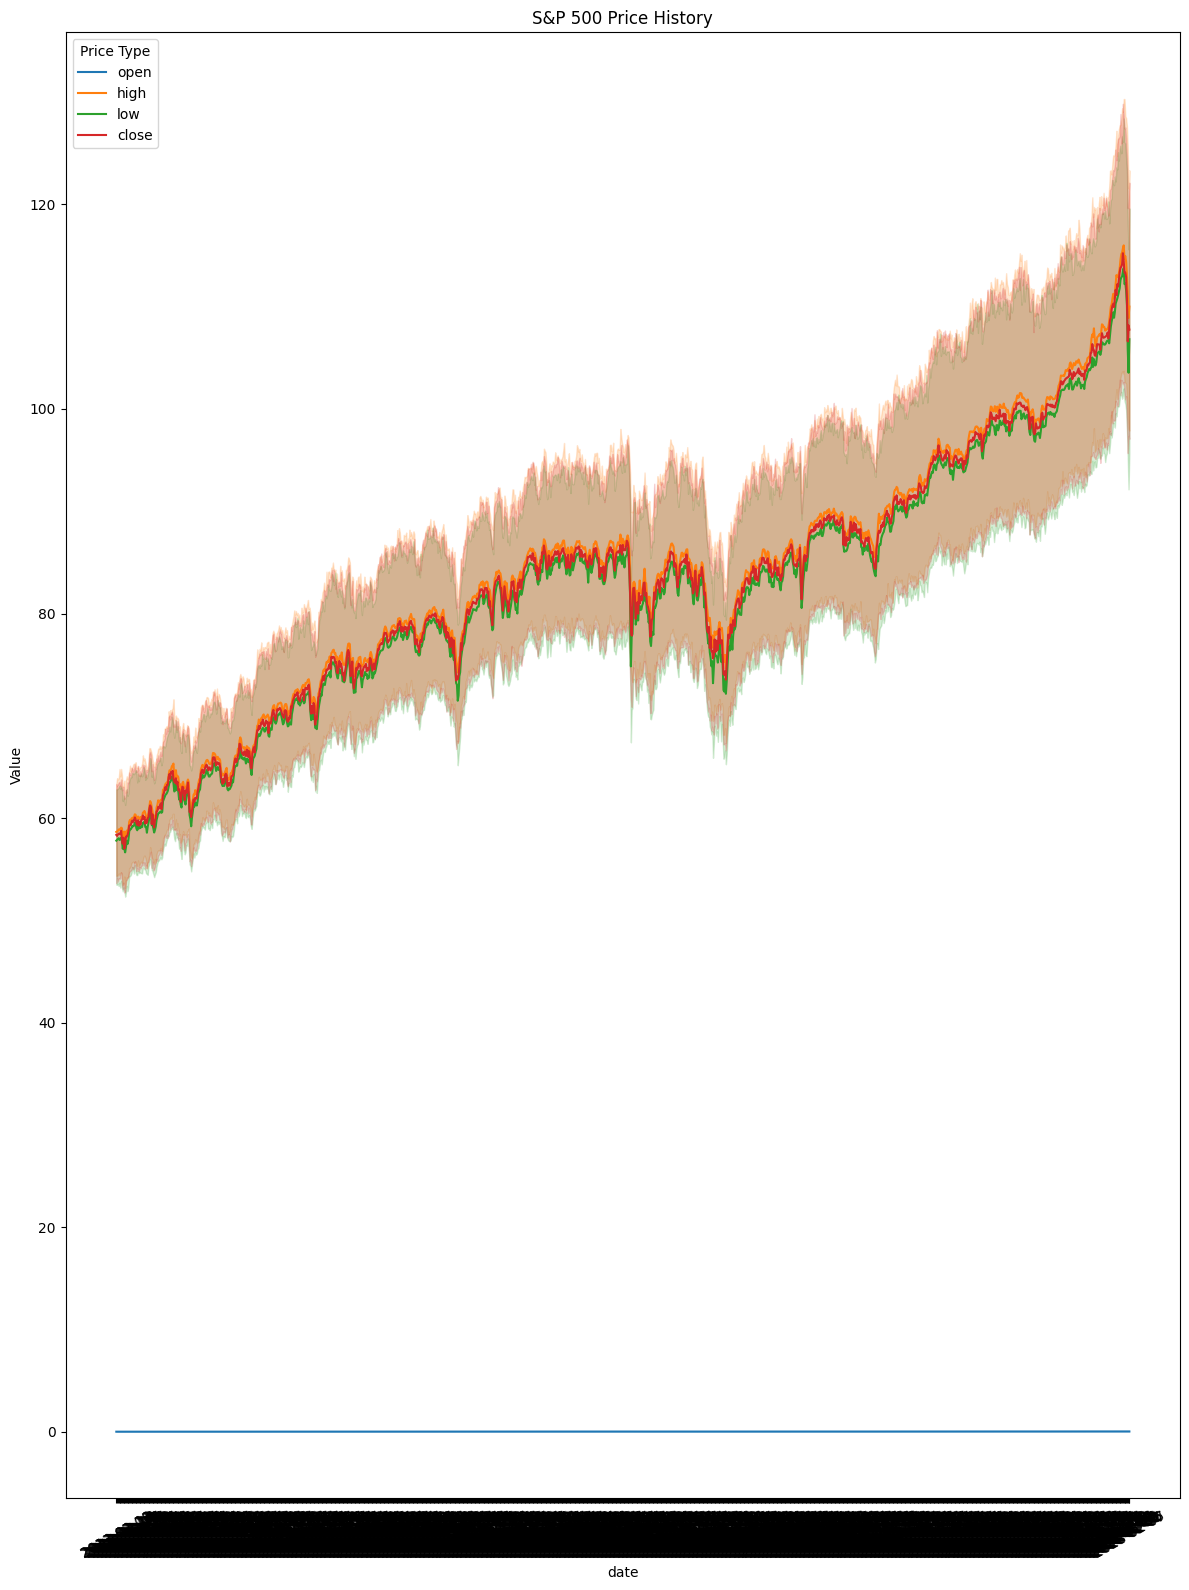

In [54]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# melt the dataframe to long format for multiple lines
melted = pd.melt(
    df_sp500,
    id_vars=["date", "Name"],
    value_vars=["open", "high", "low", "close"],
    var_name="Price Type",
    value_name="Value"
)


plt.figure(figsize=(12, 16))
sns.lineplot(data=melted, x="date", y ="Value", hue="Price Type")
plt.title("S&P 500 Price History")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import numpy as np

# # normalize the data
# def normalize_data(df, columns):
#     for column in columns:
#         df[column] = (df[column] - df[column].min()) / df[column].max()
#         return df


In [38]:
norm_df = normalize_data(df_sp500, columns=['open', 'high', 'low', 'close', 'volume'])
norm_df

,date,open,high,low,close,volume,Name
0,2013-02-08,0.006585,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,0.006497,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,0.006282,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,0.006208,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,0.006522,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,0.036830,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,0.037167,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,0.036732,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,0.034822,74.56,72.13,73.27,4924323,ZTS


In [18]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(df, columns):
    scaler = MinMaxScaler()
    scaled_value = scaler.fit_transform(df[columns])
    scaled_df = pd.DataFrame(scaled_value, columns=columns, index=df.index)
    result_df = df.copy()
    result_df[columns] = scaled_df

    return result_df

In [134]:
scale_df = scale_data(df_sp500, columns=['open', 'high', 'low', 'close','volume']) # without 'close' to avoid data leakage
scale_df


,date,open,high,low,close,volume,Name
0,2013-02-08,0.006585,0.006500,0.006456,0.006428,0.013599,AAL
1,2013-02-11,0.006497,0.006446,0.006275,0.006286,0.014367,AAL
2,2013-02-12,0.006282,0.006204,0.006196,0.006193,0.013144,AAL
3,2013-02-13,0.006208,0.006412,0.006270,0.006384,0.016595,AAL
4,2013-02-14,0.006522,0.006422,0.005734,0.006056,0.051566,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,0.036830,0.037061,0.036974,0.037232,0.004824,ZTS
619036,2018-02-02,0.037167,0.036989,0.036993,0.036724,0.004198,ZTS
619037,2018-02-05,0.036732,0.036408,0.035248,0.035284,0.004791,ZTS
619038,2018-02-06,0.034822,0.035266,0.034731,0.035010,0.007965,ZTS


# Scaled Per ticker

In [136]:
# Scaled per ticker
def scale_per_ticker(df, columns,group_col="Name"):
    result_df = df.copy()

    result_df[columns] = result_df[columns].astype(float)

    for name, group in df.groupby(group_col):
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(group[columns])
        result_df.loc[group.index, columns] = scaled
    return result_df


In [137]:
scaled_df = scale_per_ticker(df_sp500, columns=['open', 'high', 'low', 'close','volume'])

In [138]:
scaled_df

,date,open,high,low,close,volume,Name
0,2013-02-08,0.042278,0.037232,0.042794,0.038064,0.051718,AAL
1,2013-02-11,0.038335,0.034823,0.034590,0.031683,0.055196,AAL
2,2013-02-12,0.028697,0.023872,0.031042,0.027503,0.049654,AAL
3,2013-02-13,0.025411,0.033290,0.034368,0.036084,0.065294,AAL
4,2013-02-14,0.039430,0.033728,0.010200,0.021342,0.223784,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,0.942139,0.963926,0.947507,0.956084,0.064907,ZTS
619036,2018-02-02,0.955582,0.961016,0.948288,0.935964,0.055030,ZTS
619037,2018-02-05,0.938243,0.937742,0.879013,0.878893,0.064391,ZTS
619038,2018-02-06,0.862264,0.891971,0.858523,0.868060,0.114463,ZTS


# Time-Series Model

In [124]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# use the "scaled by ticker data" to train a time-series model
train_df = scaled_df.copy()
train_df = train_df[train_df["Name"] == "ZTS"].sort_values("date")

train_df["date"] = pd.to_datetime(train_df["date"])
train_df.set_index("date", inplace=True)

scaler = MinMaxScaler()
features = ['open', 'high', 'low', 'volume']
target = 'close'
scaled = scaler.fit_transform(norm_df[features + [target]])
scaled_df = pd.DataFrame(scaled, columns=features + [target], index = norm_df.index)


In [142]:
import pandas as pd
features = ['open', 'high', 'low', 'volume']
target = 'close'
scaled_df = pd.DataFrame(scaled_df, columns=features, index=scaled_df.index)

In [143]:
import numpy as np

def create_sequences(data, target, window_size=15):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i][features].values)
        y.append(data.iloc[i][target])
    return np.array(X), np.array(y)


In [144]:
X, y = create_sequences(scale_df, target)
len(X), len(y)
X.shape, y.shape

((619025, 15, 4), (619025,))

In [145]:
X[0], y[0]

(array([[0.00658545, 0.00649954, 0.0064565 , 0.01359914],
        [0.00649732, 0.0064463 , 0.00627456, 0.01436664],
        [0.00628189, 0.00620433, 0.00619588, 0.01314381],
        [0.00620844, 0.00641243, 0.00626964, 0.01659475],
        [0.0065218 , 0.00642211, 0.00573365, 0.05156577],
        [0.00602728, 0.00625272, 0.00611228, 0.02527831],
        [0.00622313, 0.00622852, 0.00618604, 0.01836575],
        [0.00614479, 0.00608334, 0.00572873, 0.02381803],
        [0.0058755 , 0.00593331, 0.00560579, 0.01928401],
        [0.00585102, 0.00576393, 0.00575823, 0.0098205 ],
        [0.00586571, 0.00584136, 0.00565497, 0.01162401],
        [0.00564048, 0.00567681, 0.00550745, 0.01523524],
        [0.00570903, 0.0057736 , 0.00574348, 0.01195414],
        [0.00581185, 0.00577844, 0.00584675, 0.00993728],
        [0.00575309, 0.00593331, 0.00581232, 0.01193198]]),
 np.float64(0.006012474296794487))

In [146]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Convert tp PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
# Create a dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(hidden_size, output_size)
        self._init_weights()

    def _init_weights(self):
        for name, param in self.lstm1.named_parameters():
            if "weight_ih" in name:
                nn.init.xavier_uniform_(param.data)
            elif "weight_hh" in name:
                nn.init.orthogonal_(param.data)
            elif "bias" in name:
                param.data.fill_(0)
                n = param.size(0)
                param.data[n//4:n//2].fill_(1)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)

    def forward(self, x):
        if torch.isnan(x).any():
            raise ValueError("Input contains NaN values")
        lstm_out, (h_n, _) = self.lstm1(x)
        last_hidden = h_n[-1]

        if last_hidden.size(0) > 1:
            last_hidden = self.batch_norm(last_hidden)

        last_hidden = self.dropout(last_hidden)

        last_hidden = torch.clamp(last_hidden, min=-10, max=10)
        output = self.fc1(last_hidden)
        output = self.fc1(last_hidden)
        output = torch.clamp(output, min=-1e6, max=1e6)

        if torch.isnan(output).any():
            print("Warning: NaN detected is output, replacing with zeros")
            output = torch.where(torch.isnan(output), torch.zeros_like(output), output)
        return output

def clip_gradients(model, max_norm=1.0):
    """Clip gradients to prevent explosion"""
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

def check_model_weights(model):
    """Check for NaN or inf in model weights"""
    for name, param in model.named_parameters():
        if torch.isnan(param).any() or torch.isinf(param).any():
            print(f"Warning: NaN/Inf found in {name}")
            return False
    return True

# Example usage with additional safety measures
def safe_training_step(model, criterion, optimizer, data, target):
    """Safe training step with NaN checking"""

    # Check input data
    if torch.isnan(data).any() or torch.isnan(target).any():
        print("Warning: NaN in input data, skipping batch")
        return None

    optimizer.zero_grad()

    # Forward pass
    output = model(data)

    # Compute loss with safety checks
    loss = criterion(output, target)

    if torch.isnan(loss) or torch.isinf(loss):
        print("Warning: NaN/Inf loss detected, skipping backward pass")
        return None

    # Backward pass
    loss.backward()

    # Check gradients
    if not check_model_weights(model):
        print("Warning: NaN in gradients, skipping optimizer step")
        return None

    # Clip gradients
    clip_gradients(model, max_norm=1.0)

    # Optimizer step
    optimizer.step()

    return loss.item()

# Add Early Stopping, Model Saving, and Model Checkpointing

In [159]:
import torch
import torch.nn as nn
import numpy as np
import os
from datetime import datetime

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.01, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1

        if self.counter >= self.patience:
            if self.restore_best_weights:
                model.load_state_dict(self.best_weights)
            return True
        return False

    def save_checkpoint(self, model):
        self.best_weights = model.state_dict().copy()



In [ ]:
# Model Saving Utilities
def save_model(model, optimizer, epoch, loss, filepath):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
        'timestamp': datetime.now().isoformat()
    }
    torch.save(checkpoint, filepath)
    print(f"Model saved to {filepath}")

def load_model(model, optimizer, filepath):
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Model loaded from {filepath}")
    print(f"Resumed from epoch {epoch}, loss: {loss:.6f}")
    return epoch, loss

In [ ]:
def make_prediction(model, X_data, scaler, features, target, sequence_length=30):
    """
    Make a prediction using the trained model.

    Parameters:
    - model: Trained LSTM model
    - X_data: Input data for prediction
    - scaler: Scaler used for normalization
    - features: List of feature names
    - target: Target variable name
    - sequence_length: Length of the input sequence

    Returns:
    - Predicted value for the target variable
    """
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Prepare input data
        last_sequence = torch.tensor(X_data[-sequence_length:], dtype=torch.float32).unsqueeze(0)
        pred_norm = model(last_sequence).item()

        # Inverse normalize the predicted value
        dummy = np.zeros((1, len(features) + 1))
        dummy[0, :-1] = last_sequence.numpy().flatten()
        dummy[0, -1] = pred_norm
        predicted_close = scaler.inverse_transform(dummy)[0, -1]

        return predicted_close

In [160]:
import torch
import torch.nn as nn

# Create model with proper parameter order
model = LSTMModel(
    input_size=len(features),
    output_size=1,  # Specify output_size explicitly
    hidden_size=64,
    num_layers=2,
    dropout=0.2  # Optional: add dropout for better stability
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Add learning rate scheduler for better training stability
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3
)

print("Starting training with NaN-safe LSTM model...")

for epoch in range(10):
    model.train()  # Set model to training mode
    epoch_losses = []
    nan_batches = 0

    for batch_idx, (xb, yb) in enumerate(dataloader):
        # Input validation (the model will also check this)
        if torch.isnan(xb).any() or torch.isnan(yb).any():
            print(f"Warning: NaN in input data at batch {batch_idx}, skipping...")
            nan_batches += 1
            continue

        # Use the safe training step function
        loss_value = safe_training_step(model, criterion, optimizer, xb, yb)

        if loss_value is None:
            print(f"Warning: Training step failed at batch {batch_idx}")
            nan_batches += 1
            continue

        epoch_losses.append(loss_value)

        # Optional: Print progress every 100 batches
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss_value:.6f}")

    # Calculate average loss for the epoch
    if epoch_losses:
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        print(f"Epoch {epoch+1}/10 completed:")
        print(f"  Average Loss: {avg_loss:.6f}")
        print(f"  Processed batches: {len(epoch_losses)}")
        if nan_batches > 0:
            print(f"  Skipped batches (NaN): {nan_batches}")

        # Update learning rate scheduler
        scheduler.step(avg_loss)

        current_lr = optimizer.param_groups[0]['lr']
        print(f" Current Learning Rate: {current_lr:.2e}")

        # Check model health
        if not check_model_weights(model):
            print("ERROR: Model weights corrupted with NaN/Inf. Stopping training.")
            break

    else:
        print(f"Epoch {epoch+1}/10: All batches failed! Stopping training.")
        break

    print("-" * 50)

print("Training completed!")

# Final model evaluation
print("\nFinal model evaluation...")
model.eval()
with torch.no_grad():
    total_loss = 0
    num_batches = 0

    for xb, yb in dataloader:
        if torch.isnan(xb).any() or torch.isnan(yb).any():
            continue

        pred = model(xb)
        if not torch.isnan(pred).any():
            loss = criterion(pred, yb)
            if not torch.isnan(loss):
                total_loss += loss.item()
                num_batches += 1

    if num_batches > 0:
        final_avg_loss = total_loss / num_batches
        print(f"Final average validation loss: {final_avg_loss:.6f}")
    else:
        print("No valid batches for final evaluation")

# Check final model state
if check_model_weights(model):
    print("✓ Final model weights are healthy")
else:
    print("✗ Final model weights contain NaN/Inf")

Starting training with NaN-safe LSTM model...
Epoch 1, Batch 0, Loss: 6.262332
Epoch 1, Batch 100, Loss: 0.216353
Epoch 1, Batch 200, Loss: 1.856394
Epoch 1, Batch 300, Loss: 0.367259
Epoch 1, Batch 400, Loss: 0.345730
Epoch 1, Batch 500, Loss: 0.295870
Epoch 1, Batch 600, Loss: 0.222800
Epoch 1, Batch 700, Loss: 0.381815
Epoch 1, Batch 800, Loss: 0.402633
Epoch 1, Batch 900, Loss: 0.197592
Epoch 1, Batch 1100, Loss: 0.644189
Epoch 1, Batch 1200, Loss: 0.417499
Epoch 1, Batch 1300, Loss: 0.123070
Epoch 1, Batch 1400, Loss: 0.072488
Epoch 1, Batch 1500, Loss: 0.825642
Epoch 1, Batch 1600, Loss: 0.418408
Epoch 1, Batch 1700, Loss: 0.148736
Epoch 1, Batch 1800, Loss: 0.319711
Epoch 1, Batch 1900, Loss: 0.236675
Epoch 1, Batch 2000, Loss: 0.488001
Epoch 1, Batch 2100, Loss: 0.064322
Epoch 1, Batch 2200, Loss: 0.960452
Epoch 1, Batch 2300, Loss: 0.090559
Epoch 1, Batch 2400, Loss: 0.044843
Epoch 1, Batch 2500, Loss: 0.033235
Epoch 1, Batch 2600, Loss: 0.055259
Epoch 1, Batch 2700, Loss: 0.0

/Users/eshan/PycharmProjects/FastAPIProject2/.venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([17])) that is different to the input size (torch.Size([17, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10 completed:
  Average Loss: 0.088379
  Processed batches: 9508
  Skipped batches (NaN): 165
 Current Learning Rate: 1.00e-04
--------------------------------------------------
Epoch 2, Batch 0, Loss: 0.002181
Epoch 2, Batch 100, Loss: 0.001051
Epoch 2, Batch 200, Loss: 0.000732
Epoch 2, Batch 300, Loss: 0.000986
Epoch 2, Batch 400, Loss: 0.001048
Epoch 2, Batch 500, Loss: 0.001323
Epoch 2, Batch 600, Loss: 0.002931
Epoch 2, Batch 700, Loss: 0.001470
Epoch 2, Batch 800, Loss: 0.000575
Epoch 2, Batch 900, Loss: 0.003676
Epoch 2, Batch 1000, Loss: 0.005590
Epoch 2, Batch 1100, Loss: 0.004650
Epoch 2, Batch 1200, Loss: 0.000589
Epoch 2, Batch 1300, Loss: 0.000875
Epoch 2, Batch 1400, Loss: 0.000575
Epoch 2, Batch 1500, Loss: 0.000584
Epoch 2, Batch 1600, Loss: 0.001704
Epoch 2, Batch 1700, Loss: 0.002932
Epoch 2, Batch 1800, Loss: 0.002031
Epoch 2, Batch 1900, Loss: 0.000568
Epoch 2, Batch 2000, Loss: 0.000630
Epoch 2, Batch 2200, Loss: 0.001358
Epoch 2, Batch 2300, Loss: 0.00278

In [148]:
# model = LSTMModel(input_size=len(features), hidden_size=64, output_size=1, num_layers=2)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
#
# for epoch in range(10):
#     for xb, yb in dataloader:
#         pred = model(xb)
#         loss = criterion(pred, yb)
#
#         if torch.isnan(loss):
#             print("NaN loss encountered. Stop training.")
#             break
#
#         optimizer.zero_grad()
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         optimizer.step()
#     print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")


/Users/eshan/PycharmProjects/FastAPIProject2/.venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


NaN loss encountered. Stop training.
Epoch 1, Loss: nan
NaN loss encountered. Stop training.
Epoch 2, Loss: nan
NaN loss encountered. Stop training.
Epoch 3, Loss: nan
NaN loss encountered. Stop training.
Epoch 4, Loss: nan
NaN loss encountered. Stop training.
Epoch 5, Loss: nan
NaN loss encountered. Stop training.
Epoch 6, Loss: nan
NaN loss encountered. Stop training.
Epoch 7, Loss: nan
NaN loss encountered. Stop training.
Epoch 8, Loss: nan
NaN loss encountered. Stop training.
Epoch 9, Loss: nan
NaN loss encountered. Stop training.
Epoch 10, Loss: nan


# Make Predictions of the next day

In [ ]:
# Predict the next day using the last 30 days of data
last_sequence = torch.tensor(X[-1], dtype=torch.float32)
predicted_norm = model(last_sequence).item()

# Inverse normalize the predicted value
dummy = np.zeros((1, len(features) + 1))
dummy[0, -1] = predicted_norm
predicted_close = scaler.inverse_transform(dummy)[0, -1]
print(f"Predicted close price for the next day: {predicted_close:.2f}")

# Train a Baseline Model (linear regression and ARIMA)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = df_sp500[df_sp500["Name"] == "AAPL"].copy()
df = df.sort_values("date")

df["target"] = df["close"].shift(-1) # Shift close price to create target variable
df.dropna(inplace=True)  # Drop the last row with NaN target
# Split into features and target
features = ['open', 'high', 'low', 'close', 'volume']
X = df[features]
y = df["target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R^2: {r2:.2f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.legend()
plt.title("Linear Regression - Close Price Forecast")
plt.show()

In [60]:
## ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Use just the close prices
series = df["close"].copy()

# Split into train and test
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

In [86]:
# Fit ARIMA model (order: AR, differencing, MA)
model = ARIMA(train, order=(11, 2, 5))
model_fit = model.fit()

# Forecast the next 10 days
forecast = model_fit.forecast(steps=len(test))

/Users/eshan/PycharmProjects/FastAPIProject2/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/eshan/PycharmProjects/FastAPIProject2/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/eshan/PycharmProjects/FastAPIProject2/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/eshan/PycharmProjects/FastAPIP

In [87]:
from sklearn.metrics import mean_squared_error
mse_arima = mean_squared_error(test, forecast)
print(f"ARIMA MSE: {mse_arima:.2f}")

ARIMA MSE: 370.24


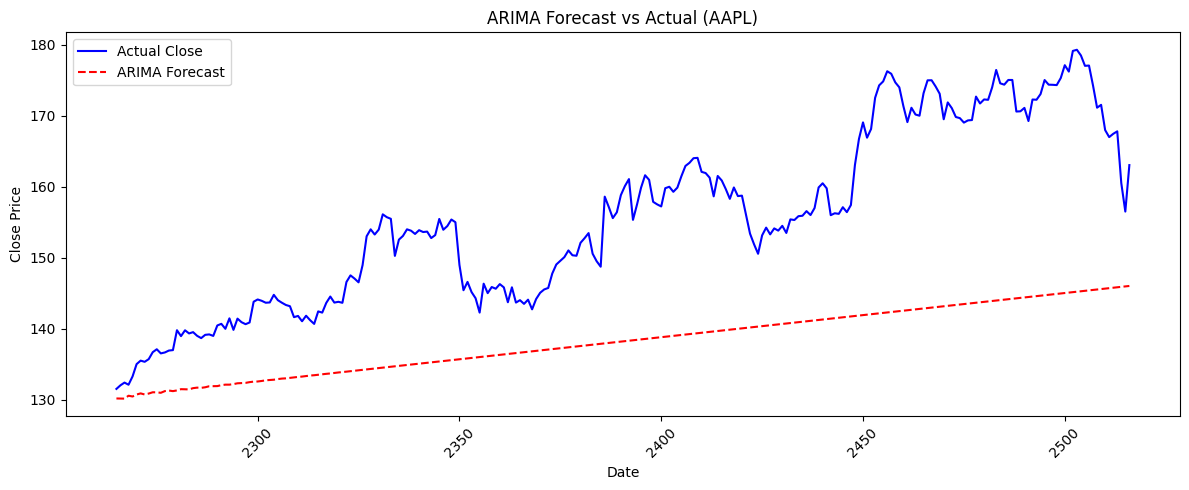

In [88]:
plt.figure(figsize=(12, 5))

# Plot original series
plt.plot(series.index[train_size:], test.values, label="Actual Close", color="blue")
plt.plot(series.index[train_size:], forecast, label="ARIMA Forecast", color="red", linestyle="--")

plt.title("ARIMA Forecast vs Actual (AAPL)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
import requests
from collections import defaultdict

POLYGON_APIKEY = "SnsJtDM9NI3nlgJXmYpcWdeHo7g_u2Xb"
exchange_to_country = {
    "XNAS": "US",
    "XNYS": "US",
    "XTKS": "Japan",
    "XTAI": "Taiwan",
    "XSHG": "China",
    "XHKG": "Hong Kong"
}

# Step 1: Get tickers
url = "https://api.polygon.io/v3/reference/tickers"
params = {
    "apiKey": POLYGON_APIKEY,
    "limit": 1000,  # increase this or use pagination
    "active": "true",
    "market": "stocks"
}

response = requests.get(url, params=params)
tickers = response.json().get("results", [])

# Step 2: Organize by region
region_dict = defaultdict(list)

for ticker in tickers:
    ex = ticker.get("primary_exchange", "")
    country = exchange_to_country.get(ex)
    if country:
        region_dict[country].append(ticker)

# Step 3: Sort by market cap and select top 10
top_10_per_region = {}
for region, companies in region_dict.items():
    sorted_companies = sorted(companies, key=lambda x: x.get("market_cap", 0), reverse=True)
    top_10_per_region[region] = sorted_companies[:10]

# Step 4: Print results
for region, top_10 in top_10_per_region.items():
    print(f"Top 10 in {region}:")
    for company in top_10:
        print(f"{company['ticker']} - {company.get('name', '')} - Market Cap: {company.get('market_cap')}")
    print("-" * 40)


Top 10 in US:
A - Agilent Technologies Inc. - Market Cap: None
AA - Alcoa Corporation - Market Cap: None
AACB - Artius II Acquisition Inc. Class A Ordinary Shares - Market Cap: None
AACBR - Artius II Acquisition Inc. Rights - Market Cap: None
AACBU - Artius II Acquisition Inc. Units - Market Cap: None
AACG - ATA Creativity Global American Depositary Shares - Market Cap: None
AACIU - Armada Acquisition Corp. II Units - Market Cap: None
AACT - Ares Acquisition Corporation II - Market Cap: None
AACT.U - Ares Acquisition Corporation II Units, each consisting of one Class A ordinary share and one-half of one redeemable warrant - Market Cap: None
AACT.WS - Ares Acquisition Corporation II Redeemable Warrants, each whole warrant exercisable for one Class A ordinary share at an exercise price of $11.50 - Market Cap: None
----------------------------------------


In [63]:
top_10_per_region

{'US': [{'ticker': 'A',
   'name': 'Agilent Technologies Inc.',
   'market': 'stocks',
   'locale': 'us',
   'primary_exchange': 'XNYS',
   'type': 'CS',
   'active': True,
   'currency_name': 'usd',
   'cik': '0001090872',
   'composite_figi': 'BBG000C2V3D6',
   'share_class_figi': 'BBG001SCTQY4',
   'last_updated_utc': '2025-05-21T00:00:00Z'},
  {'ticker': 'AA',
   'name': 'Alcoa Corporation',
   'market': 'stocks',
   'locale': 'us',
   'primary_exchange': 'XNYS',
   'type': 'CS',
   'active': True,
   'currency_name': 'usd',
   'cik': '0001675149',
   'composite_figi': 'BBG00B3T3HD3',
   'share_class_figi': 'BBG00B3T3HF1',
   'last_updated_utc': '2025-05-29T00:00:00Z'},
  {'ticker': 'AACB',
   'name': 'Artius II Acquisition Inc. Class A Ordinary Shares',
   'market': 'stocks',
   'locale': 'us',
   'primary_exchange': 'XNAS',
   'type': 'CS',
   'active': True,
   'currency_name': 'usd',
   'cik': '0002034334',
   'last_updated_utc': '2025-05-29T00:00:00Z'},
  {'ticker': 'AACBR',
 

In [64]:
# Fetch OHLCV time series for a given ticker
def fetch_ohlcv(ticker, api_key, timespan="day", from_date="2024-01-01", to_date="2025-05-28"):
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/{timespan}/{from_date}/{to_date}"
    params = {"adjusted": "true", "sort": "asc", "limit": 50000, "apiKey": api_key}
    res = requests.get(url, params=params).json()
    return res["results"] if "results" in res else []


In [66]:
import pandas as pd
from tqdm import tqdm

api_key = POLYGON_APIKEY


all_data = []

for region, companies in top_10_per_region.items():
    for company in companies:
        ticker

for ticker in tqdm(tickers):
    data = fetch_ohlcv(ticker, api_key)
    for d in data:
        d["ticker"] = ticker
        all_data.append(d)

df = pd.DataFrame(all_data)
df["t"] = pd.to_datetime(df["t"], unit="ms")  # timestamp to datetime
df.rename(columns={"t": "date", "c": "close", "o": "open", "h": "high", "l": "low", "v": "volume"}, inplace=True)
df.to_csv("historical_prices.csv", index=False)


  9%|▉         | 89/1000 [01:08<11:44,  1.29it/s]


JSONDecodeError: Extra data: line 1 column 5 (char 4)

In [38]:
df

,volume,vw,open,close,high,low,date,n,ticker
0,0.326792,248.3450,0.326594,0.314881,0.310404,0.331362,2024-01-02 05:00:00,1177663,TSLA
1,0.406343,239.8167,0.311385,0.285368,0.294217,0.305978,2024-01-03 05:00:00,1273469,TSLA
2,0.316933,240.2989,0.294298,0.283828,0.285557,0.310402,2024-01-04 05:00:00,1001611,TSLA
3,0.267884,237.8911,0.287171,0.282526,0.278058,0.301523,2024-01-05 05:00:00,934668,TSLA
4,0.232411,238.5962,0.285024,0.291288,0.281343,0.302778,2024-01-08 05:00:00,970810,TSLA
...,...,...,...,...,...,...,...,...,...
1051,0.211519,454.3728,0.892956,0.867345,0.898238,0.894326,2025-05-21 04:00:00,320670,MSFT
1052,0.190612,456.1561,0.896228,0.887611,0.922018,0.911757,2025-05-22 04:00:00,334105,MSFT
1053,0.170568,451.0242,0.853427,0.846195,0.858862,0.870059,2025-05-23 04:00:00,323259,MSFT
1054,0.242362,458.9856,0.909404,0.939204,0.928757,0.930267,2025-05-27 04:00:00,362158,MSFT


In [37]:
# Basic preprocessing
df = pd.read_csv("historical_prices.csv")
df['date'] = pd.to_datetime(df['date'])

# Normalize per ticker
from sklearn.preprocessing import MinMaxScaler

def scale_ticker(df, columns):
    scalers = {}
    for ticker in df['ticker'].unique():
        scaler = MinMaxScaler()
        mask = df['ticker'] == ticker
        df.loc[mask, columns] = scaler.fit_transform(df.loc[mask, columns])
        scalers[ticker] = scaler
    return df, scalers

df, scalers = scale_ticker(df, ["close", "open", "high", "low", "volume"])
